In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score       

In [2]:
df=pd.read_csv('creditcardfraud.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

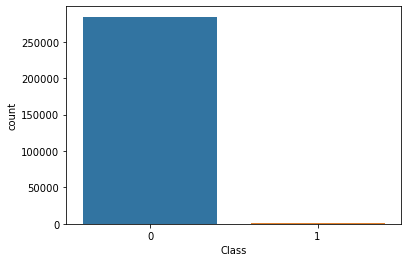

In [3]:
sns.countplot(df.Class)

<!-- MSMOTE to handle imbalanced data -->

# MSMOTE to handle imbalanced data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

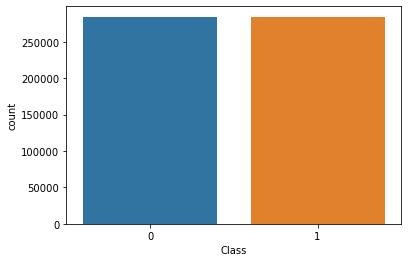

In [4]:
X=df.drop('Class', axis=1)
y=df['Class']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

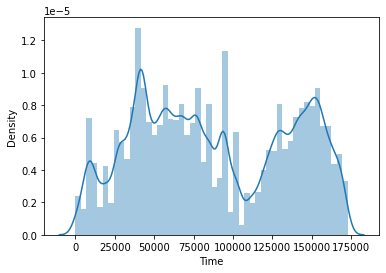

In [5]:
df1=pd.concat([X,y], axis=1)
sns.distplot(df1['Time'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

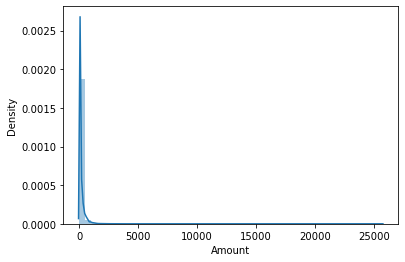

In [6]:
sns.distplot(df1['Amount'])

<AxesSubplot:xlabel='Time', ylabel='Amount'>

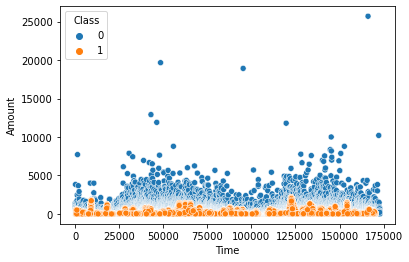

In [7]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df1)

<AxesSubplot:>

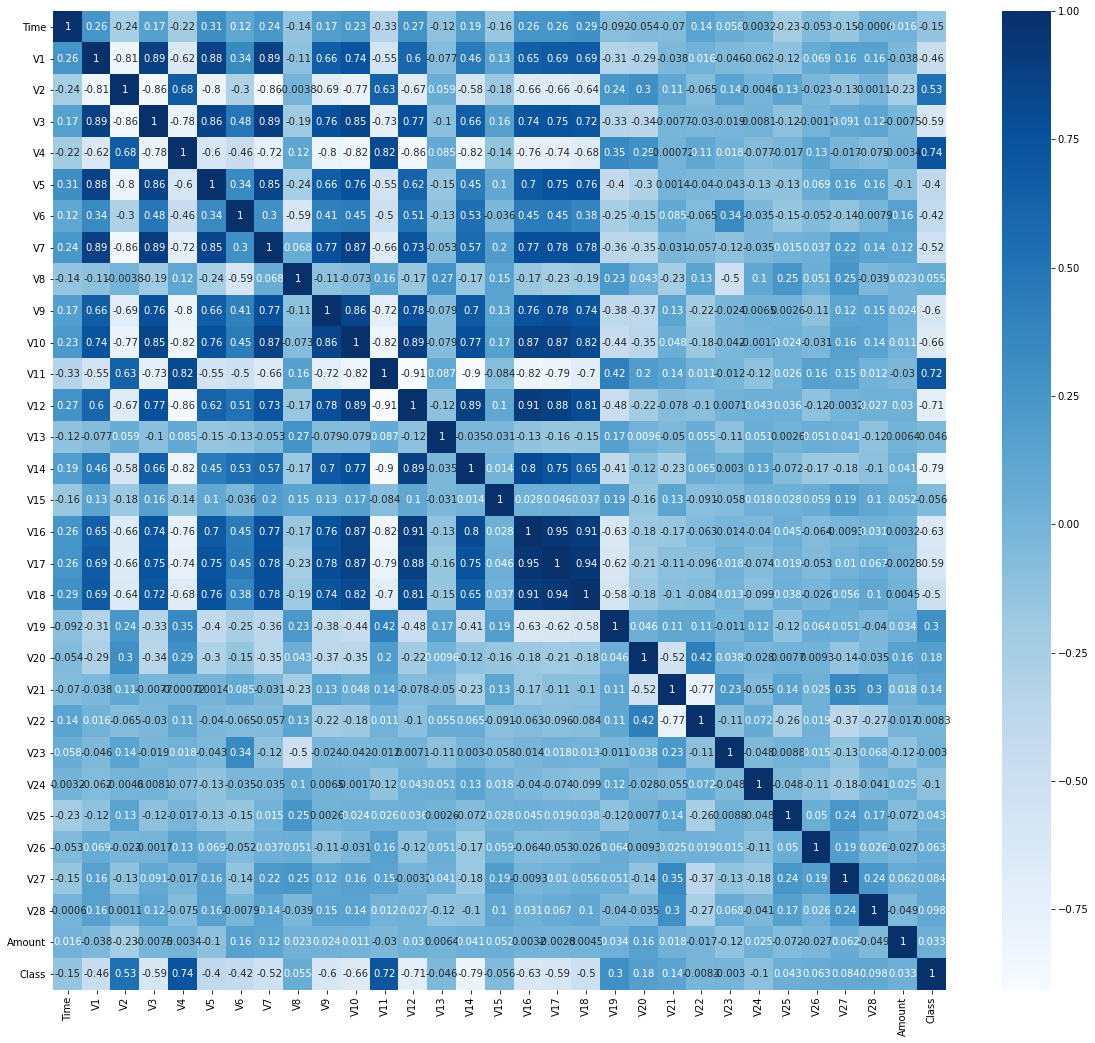

In [8]:
plt.figure(figsize=(20,18))
sns.heatmap(df1.corr(),annot=True, cmap="Blues")

In [9]:
rob_scaler = RobustScaler()
df1['Amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1, 1))
df1['Time'] = rob_scaler.fit_transform(df1['Time'].values.reshape(-1, 1))

In [10]:
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
X=df1.drop('Class', axis=1)
y=df1['Class']
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [12]:
def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    return accuracy_score(y_test,preds)

In [13]:
models=['LR', 'XGB', 'RF']
acc=[]

# LogisticRegression

In [14]:
predict(LogisticRegression(), X_train, X_test, y_train, y_test)

[[56523   499]
 [ 1711 54993]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     57022
           1       0.99      0.97      0.98     56704

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



0.980567328491286

# XGBClassifier

In [15]:
predict(XGBClassifier(),X_train,X_test, y_train, y_test)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[57000    22]
 [    1 56703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57022
           1       1.00      1.00      1.00     56704

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



0.9997977595272849

# RandomForestClassifier

In [ ]:
predict(RandomForestClassifier(),X_train,X_test, y_train, y_test)